In [12]:
# standard imports and pre-code developments 

import tensorflow as tf 
import matplotlib.pyplot as plt 
tf.__version__

# data import 
mnist = tf.keras.datasets.mnist # 28 * 28 

# data viz 

(x_train, y_train) , (x_test, y_test) = mnist.load_data() 
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


These are all the mnist, but it is capped at 5 to not crash kernel! There are a total of 60000


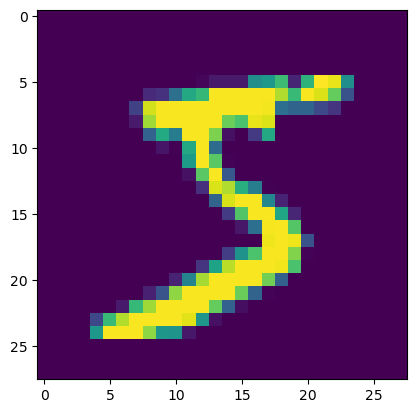

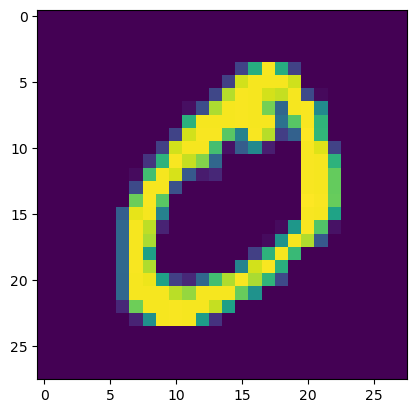

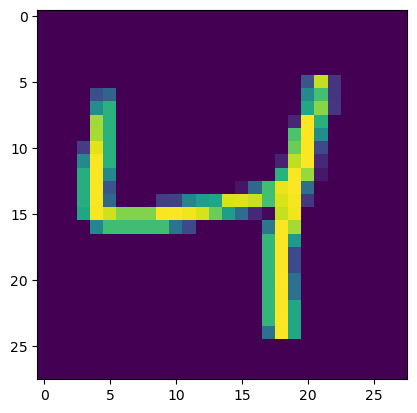

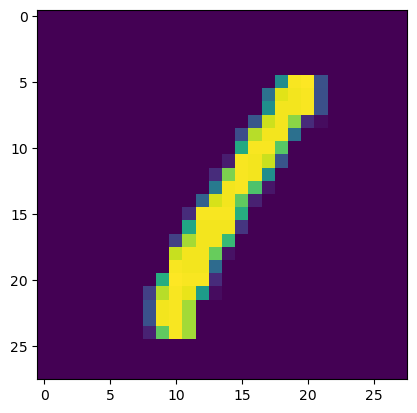

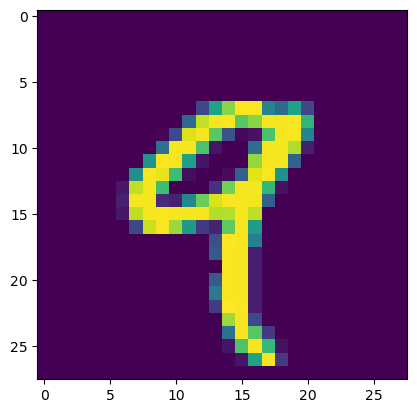

In [13]:
# functions 

def looping_dataset(x_train): 
    counts = len(x_train) 
    print("These are all the mnist, but it is capped at 5 to not crash kernel! There are a total of " + str(counts)) 
    for digits in range(counts): 
        if digits < 5: # capping at 5 
            plt.imshow(x_train[digits])
            plt.show() 

looping_dataset(x_train)

In [14]:
# scaling this and normalizing it 

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential() # selecting model 
model.add(tf.keras.layers.Flatten()) # input layers 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # hidden layers to the activation function 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # hidden layers 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # output layer 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # loss, optimizer 

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8697 - loss: 0.4563
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9664 - loss: 0.1115
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0718


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print("does this generalize or just memorize? check out the thoughts.")
print("loss test", val_loss, "accuracy test", val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.0984
does this generalize or just memorize? check out the thoughts.
loss: 0.0874948501586914 accuracy compared to test 0.9739999771118164


In [21]:
# model config and playing
# model.save('mnist_tf_first_demo')
# new_model = tf.keras.models.load_model('mnist_tf_first_demo')
predictions = model.predict([x_test])

print("one hot arrays", predictions)

184/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step

c:\Users\jeffl\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
one hot arrays [[7.5278606e-10 8.2341978e-07 5.6050731e-06 ... 9.9995828e-01
  1.3949193e-07 9.2578823e-08]
 [1.1253468e-08 2.6206593e-03 9.9735212e-01 ... 2.3705933e-07
  9.7062816e-08 2.6039186e-12]
 [1.7366348e-08 9.9977213e-01 1.0151826e-05 ... 6.1193161e-05
  1.2834500e-04 1.8620948e-06]
 ...
 [6.7066346e-11 4.7637650e-07 1.4712944e-08 ... 1.1700124e-05
  4.3767116e-07 4.4543180e-05]
 [8.8974431e-08 1.3630259e-06 6.2501101e-08 ... 4.1392300e-06
  1.8000757e-05 1.5860833e-07]
 [1.2860741e-07 3.5903358e-07 5.0882778e-07 ... 1.3256039e-08
  3.4818722e-08 2.3051202e-08]]


c:\Users\jeffl\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
7


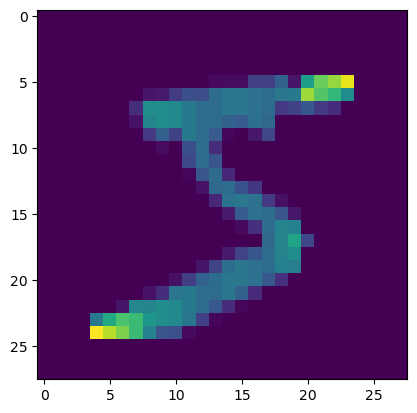

7


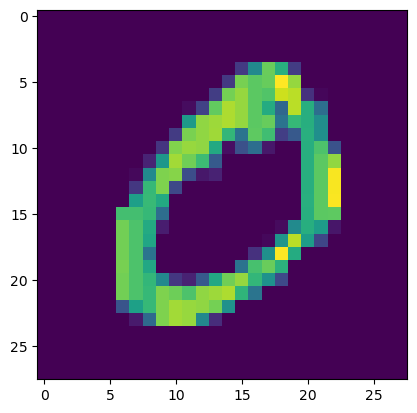

7


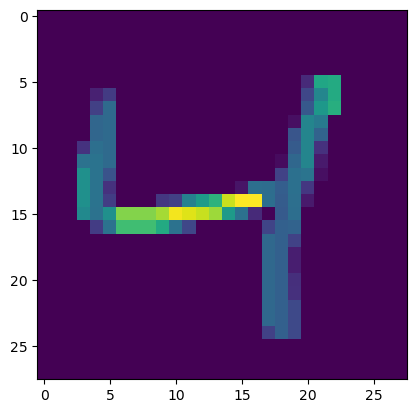

7


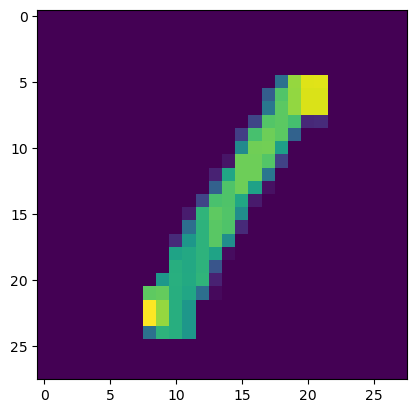

7


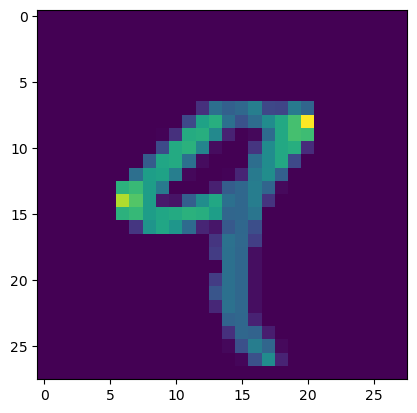

In [24]:
import numpy as np 
        
def looping_testing_model(model): 
    predictions = model.predict([x_test])
    counts = len(x_test)
    for digits in range(counts): 
        if digits < 5: # capping at 5 
            print(np.argmax(predictions[0]))
            plt.imshow(x_train[digits])
            plt.show() 
            
looping_testing_model(model)


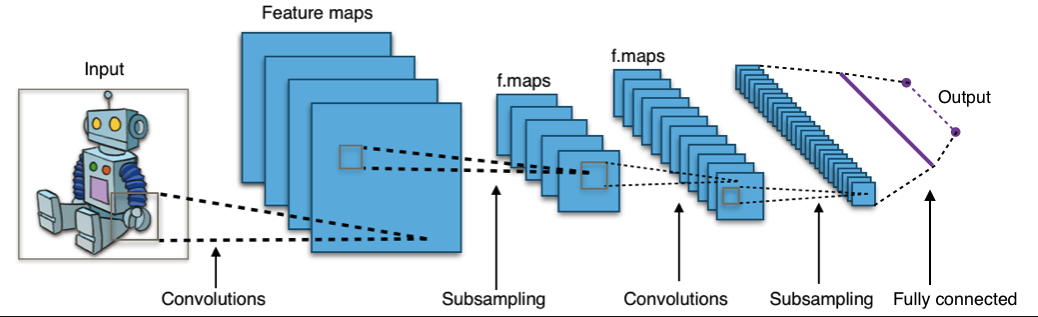 
https://botpenguin.com/blogs/building-sequential-models-with-keras, https://www.tensorflow.org/api_docs/python/tf/keras/Sequential